In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
from Quantum_Tunnelling.Wave_Packet import wave_packet

# Probability of Wave Existing either side of the barrier

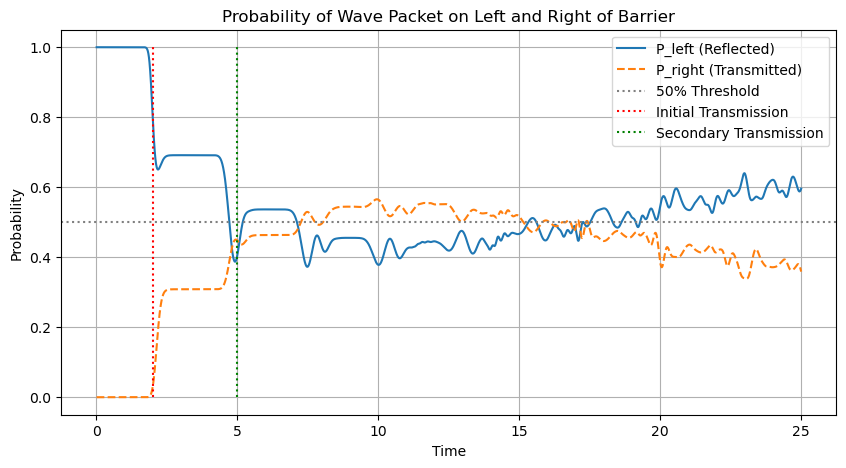

In [15]:
# Initialize wave packet
wave = wave_packet(
    sigma0 = 10.0,       # Moderate wave packet width
    x0 = -100,           # Initial position, far enough from the barrier
    k0 = 2.0,            # Higher momentum for increased tunneling probability
    barrier_height = 1.5, # Comparable to kinetic energy
    barrier_width = 5.0,  # Moderate width to allow some tunneling
    dt = 0.005,          # Smaller timestep for accuracy
    n_points = 500       # More points for better resolution
)


# Store probabilities over time
times = []
P_left_list = []
P_right_list = []

# Run simulation
for _ in range(5000):  # Evolve for 500 time steps
    wave.evolve()
    P_left, P_right, time = wave.calculate_probabilities()
    
    times.append(time)
    P_left_list.append(P_left)
    P_right_list.append(P_right)

# Plot probabilities over time
plt.figure(figsize=(10, 5))
plt.plot(times, P_left_list, label='P_left (Reflected)')
plt.plot(times, P_right_list, label='P_right (Transmitted)', linestyle='dashed')
plt.axhline(0.5, color='gray', linestyle='dotted', label='50% Threshold')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.vlines(x=2, ymin=0, ymax=1, color='red', linestyle='dotted', label='Initial Transmission')
plt.vlines(x=5, ymin=0, ymax=1, color='green', linestyle='dotted', label='Secondary Transmission')
plt.title('Probability of Wave Packet on Left and Right of Barrier')
plt.grid()
plt.legend()
plt.show()

Here, we see that initially the particle is entirely to the left of the barrier. At approximately t=2, we see the inital Transmission through the barrier. 

At t=5, we see another Transmission. This system has limits for max/min x values, so this is another transmission after reflection from the plot boundaries. After this we see a descent into 'chaos', as the wavepackets either side disperse over time, and reflect/transmit at random times. The probability sum is always 1.

# Transmission Coefficient vs E, for various barrier heights & widths. 

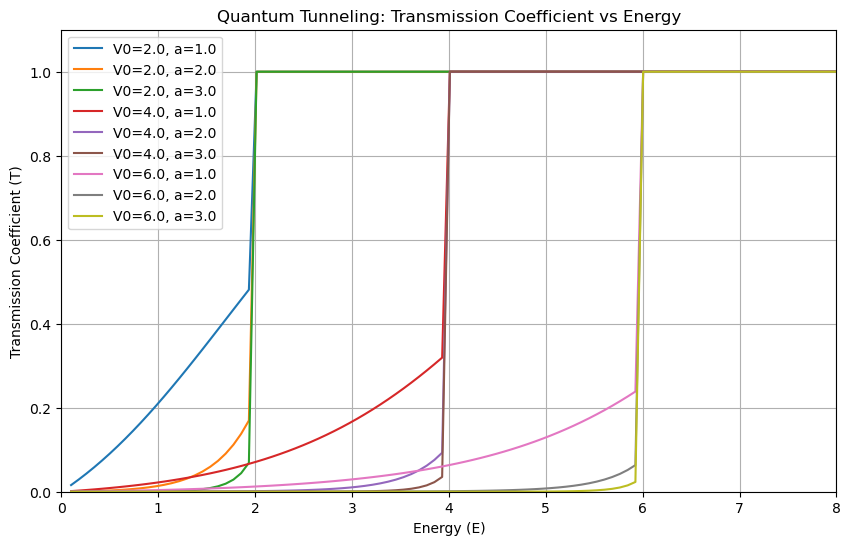

In [6]:
# Define ranges for energy, barrier height, and barrier width
E_values = np.linspace(0.1, 8.0, 100)  # Energy values
V_values = [2.0, 4.0, 6.0]  # Barrier heights
a_values = [1.0, 2.0, 3.0]  # Barrier widths

# Plot transmission coefficient as a function of energy
plt.figure(figsize=(10, 6))

for V0 in V_values:
    for a in a_values:
        wave = wave_packet(barrier_height = V0, barrier_width = a)
        T_values = [wave.analytical_transmission_coefficient(E) for E in E_values]
        plt.plot(E_values, T_values, label=f"V0={V0}, a={a}")

plt.xlabel("Energy (E)")
plt.ylabel("Transmission Coefficient (T)")
plt.title("Quantum Tunneling: Transmission Coefficient vs Energy")
plt.legend()
plt.grid(True)
plt.ylim(0, 1.1)  # T ranges from 0 to 1
plt.xlim([0,8])
plt.show()


Here is the plot of the transmission coefficient T as a function of energy E for different barrier heights V_{0} and barrier widthsa. 

As expected:

When E≥V, the transmission approaches 1 (full transmission).

For E<V , the transmission decreases exponentially with increasing a, showing stronger suppression for wider and higher barriers.

# Transmission Coefficient (T) vs Barrier Width (a)

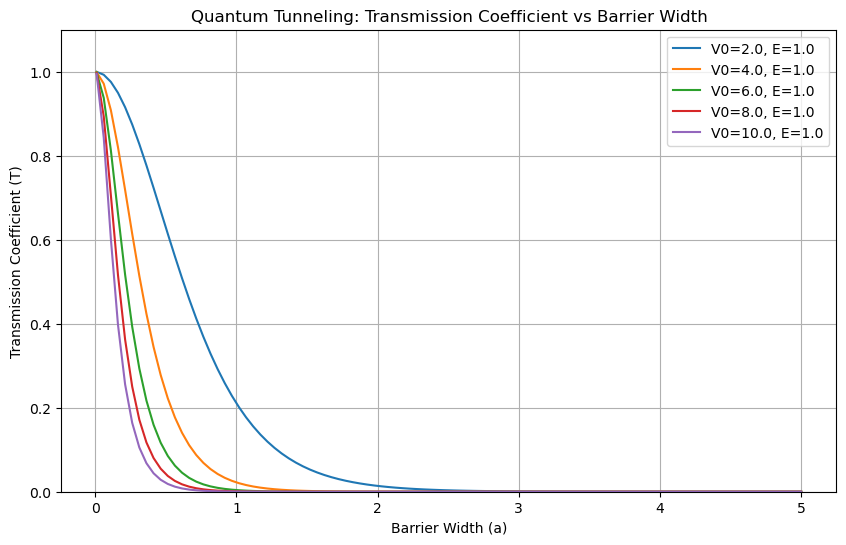

In [5]:
# Define a range of barrier widths
a_values = np.linspace(0.01, 5.0, 100)  # Barrier width values

# Select specific energy and barrier height values for visualization
E_fixed = 1.0  # Fixed energy of the particle
V_values_fixed = [2.0, 4.0, 6.0, 8.0, 10.0]  # Different barrier heights


# Plot transmission coefficient as a function of barrier width
plt.figure(figsize=(10, 6))

for V0 in V_values_fixed:
    T_values = []
    for a in a_values:
        wave = wave_packet(barrier_height=V0, barrier_width =a)
        T_values.append(wave.analytical_transmission_coefficient(E_fixed))
    plt.plot(a_values, T_values, label=f"V0={V0}, E={E_fixed}")

plt.xlabel("Barrier Width (a)")
plt.ylabel("Transmission Coefficient (T)")
plt.title("Quantum Tunneling: Transmission Coefficient vs Barrier Width")
plt.legend()
plt.grid(True)
plt.ylim(0, 1.1)  # T ranges from 0 to 1
plt.show()


Here, usign the Transmission Coefficient derived in the attached Doc, for 5 barrier heights, we plot the Transmission coeffecient. One can see as the barrier gets wider, T drops in each case. The same relationship can be seen with the barrier height, in that a smaller height is inversely proportional to T.